In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

In [3]:
def RBF(x, y, xj, yj, sigma=1.0):

  phij = torch.exp((-(x-xj)**2 - (y-yj)**2)/sigma**2)

  return phij


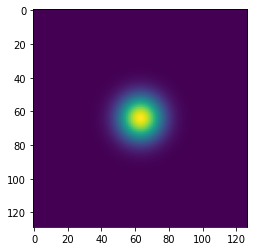

In [4]:
x = torch.linspace(-5, 5, 129)
y = torch.linspace(-5, 5, 127)

# Generate a grid
X, Y = torch.meshgrid(x,y)

xj = 0
yj = 0
phij = RBF(X, Y, xj, yj)

plt.imshow(phij)
plt.show()

In [19]:
def buildVDMmat(x,y):
  # building the VDM matrix from
  # points x1, y1, x2, y2, .....xn, yn


  n = x.numel()
  Phi = torch.zeros(n, n)

  for j in range(n):
    Phi[:,j] = RBF(x, y, x[j], y[j], sigma=1)
  
  return Phi

def buildVDMmatFast(x,y, sigma=1):

  X = torch.cat((x.unsqueeze(1),y.unsqueeze(1)), dim=1)
  Phi = torch.cdist(X, X)
  Phi = torch.exp(-Phi/sigma)
  return Phi

In [20]:
# test VDM matrix
x = torch.randn(1502)
y = torch.randn(1502)

Phi = buildVDMmatFast(x,y)

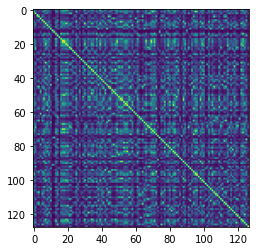

In [21]:
plt.imshow(Phi[:128,1:128])

In [36]:
def get_interpolation_coef(x,y,c, sigma=1):
  # build VDM matrix
  Phi = buildVDMmatFast(x,y, sigma)
  # solve the linear system Phi@a = c
  a = torch.linalg.solve(Phi, c)

  return a


In [27]:
def interpolate_new_points(x, y, xI, yI, a, sigma=1):
  X  = torch.cat((x.unsqueeze(1),y.unsqueeze(1)), dim=1)
  XI = torch.cat((xI.unsqueeze(1),yI.unsqueeze(1)), dim=1)
  Phi = torch.cdist(XI, X)
  Phi = torch.exp(-Phi/sigma)

  cnew = Phi@a

  return cnew

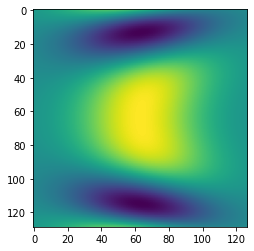

In [41]:
# test the code
x = torch.linspace(-5, 5, 129)
y = torch.linspace(-5, 5, 127)

# Generate a grid
X, Y = torch.meshgrid(x,y)

f = torch.cos((X**2 -Y)/5)*torch.exp(-(Y**2)/10) 
plt.imshow(f)

Maximmal error =  tensor(0.1699)


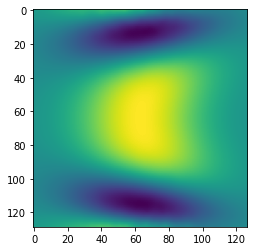

In [47]:
n = 1024
x = 10*torch.rand(n)-5
y = 10*torch.rand(n)-5
c = torch.cos((x**2 -y)/5)*torch.exp(-(y**2)/10)

sigma=5

a = get_interpolation_coef(x,y,c, sigma)
xI = X.flatten()
yI = Y.flatten()

cnew = interpolate_new_points(x, y, xI, yI, a, sigma)

cnew = torch.reshape(cnew, (X.shape[0], X.shape[1]))
plt.imshow(cnew)

error = torch.abs(cnew - f)
print('Maximmal error = ', torch.max(error.view(-1)) )

In [ ]:
an